In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from os.path import join
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import ImageGrid

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adam

# LOAD DATASET, EXPLORE IT AND SPLIT INTO TRAIN, VALIDATION AND TEST SET.

In [4]:
# Read the labels.csv file

DATA_DIR = "C:\\Desktop\\dog-breed-identification\\"

labels_all = pd.read_csv(join(DATA_DIR, "labels.csv"))
print(labels_all.shape)
labels_all.head()

(10222, 2)


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

C:\Users\oluwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

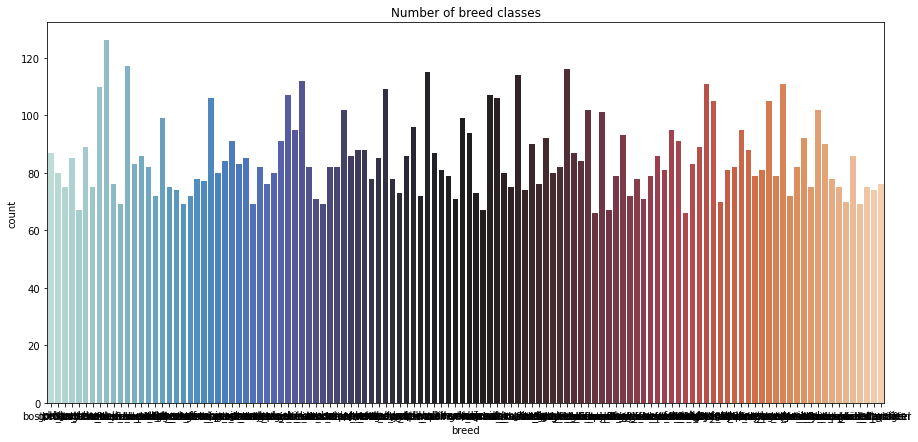

In [5]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
plt.figure(figsize=(15,7))
g = sns.countplot(breeds_all, palette="icefire")
plt.title("Number of breed classes")
breed_counts = breeds_all.value_counts()
breed_counts

In [6]:
# Selecting breeds
# 15 Dog breeds
CLASS_NAMES = ['affenpinscher',
'afghan_hound',
'african_hunting_dog',
'airedale',
'american_staffordshire_terrier',
'appenzeller',
'australian_terrier',
'basenji',
'basset',
'beagle',
'bedlington_terrier',
'bernese_mountain_dog',
'black-and-tan_coonhound',
'blenheim_spaniel',
'bloodhound']


labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]

labels = labels.reset_index()
labels.head()

index                                id                breed
0      5  002211c81b498ef88e1b40b9abf84e1d   bedlington_terrier
1      6  00290d3e1fdd27226ba27a8ce248ce85   bedlington_terrier
2      8  003df8b8a8b05244b1d920bb6cf451f9              basenji
3     15  00792e341f3c6eb33663e415d0715370  african_hunting_dog
4     23  0097c6242c6f3071762d9f85c3ef1b2f   bedlington_terrier

In [7]:
def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string, name of the file
        train_or_test: string 'train' or 'test'
        size: resize the original image
    # Returns
        Image as numpy array
    """
    img = image.load_img(join(DATA_DIR, train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

In [8]:
# Loading the development set
#"One hot encoded output shape"
#Image resizing
IMG_SIZE = 224

X_all = np.zeros((len(labels), IMG_SIZE, IMG_SIZE, 3), dtype='float32') #inputs 
Y_all = label_binarize(labels['breed'], classes = CLASS_NAMES) #Labels
#label_binarize
for i in tqdm(range(len(labels))):
    img = read_img(labels['id'][i], 'train', (IMG_SIZE, IMG_SIZE))
    x = np.expand_dims(img.copy(), axis=0)
    X_all[i] = x/255

    
print('Development Images shape: {} size: {:,}'.format(X_all.shape, X_all.size))
print('One-hot encoded output shape: {} size: {:,}'.format(Y_all.shape, Y_all.size))

100%|█████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:04<00:00, 281.72it/s]

Development Images shape: (1407, 224, 224, 3) size: 211,792,896
One-hot encoded output shape: (1407, 15) size: 21,105


In [9]:
# Splitting the development data set into training and validation data sets

X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_all, Y_all, test_size = 0.1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)
print("X_train shape:",X_train.shape)
print("Y_train shape:{}".format(Y_train.shape))
print("X_val shape:",X_val.shape)
print("Y_val shape:{}".format(Y_val.shape))
print("X_test shape:",X_test.shape)
print("Y_test shape:{}".format(Y_test.shape))

X_train shape: (1012, 224, 224, 3)
Y_train shape:(1012, 15)
X_val shape: (254, 224, 224, 3)
Y_val shape:(254, 15)
X_test shape: (141, 224, 224, 3)
Y_test shape:(141, 15)


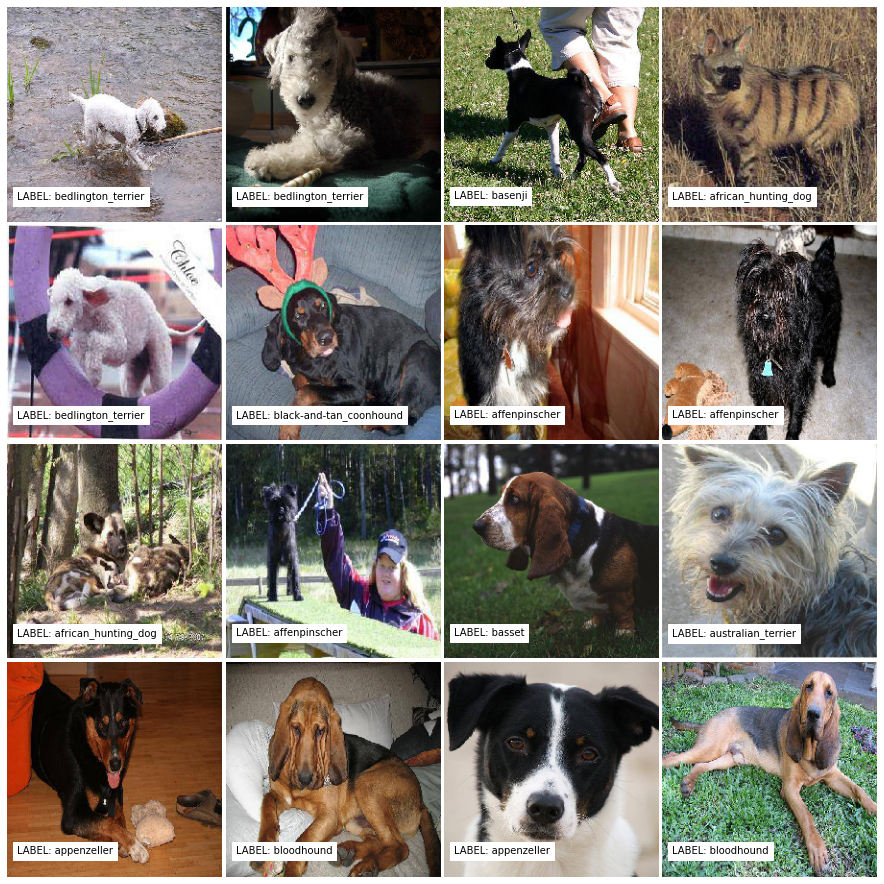

In [10]:
# Displaying some images in the development set

IMG_GRID_ROWS = 4
IMG_GRID_COLUMNS = 4
num_of_images = IMG_GRID_ROWS * IMG_GRID_COLUMNS
fig = plt.figure(1, figsize=(IMG_GRID_COLUMNS * 4, IMG_GRID_ROWS * 4))
grid = ImageGrid(fig, 111, nrows_ncols=(IMG_GRID_ROWS, IMG_GRID_COLUMNS), axes_pad=0.05)

for i in range(num_of_images):
    ax = grid[i]
    ax.imshow(X_all[i,:,:,:])
    class_index = np.argmax(Y_all[i])
    ax.text(10, 200, ('LABEL: %s' % CLASS_NAMES[class_index]), backgroundcolor='w')
    ax.axis('off')
plt.show()

## DATA SCALING

In [11]:
# The data seems to be already scale dbetween 0 and 1, so we do nothing
print(X_train.min(),X_train.max(),X_train.mean(),X_train.std())
print(X_val.min(),X_val.max(),X_val.mean(),X_val.std())

0.0 1.0 0.4363618 0.26840848
0.0 1.0 0.4300906 0.2662357


## 4. Define your callbacks (save your model, patience, etc.)

In [12]:
model_name = "vgg_dog-breed15_cnn.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%4 == 0 and epoch!= 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## DATA AUGMENTATION

In [13]:
#DATA AUGMENTATION
batch_size = 32
gen_params = {"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0}
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)

train_gen.fit(X_train,seed = 1)
val_gen.fit(X_val, seed = 1)

train_flow = train_gen.flow(X_train,Y_train,batch_size = batch_size)
val_flow = val_gen.flow(X_val,Y_val,batch_size = batch_size) 

0.37124345 0.26580483
0.0 1.0


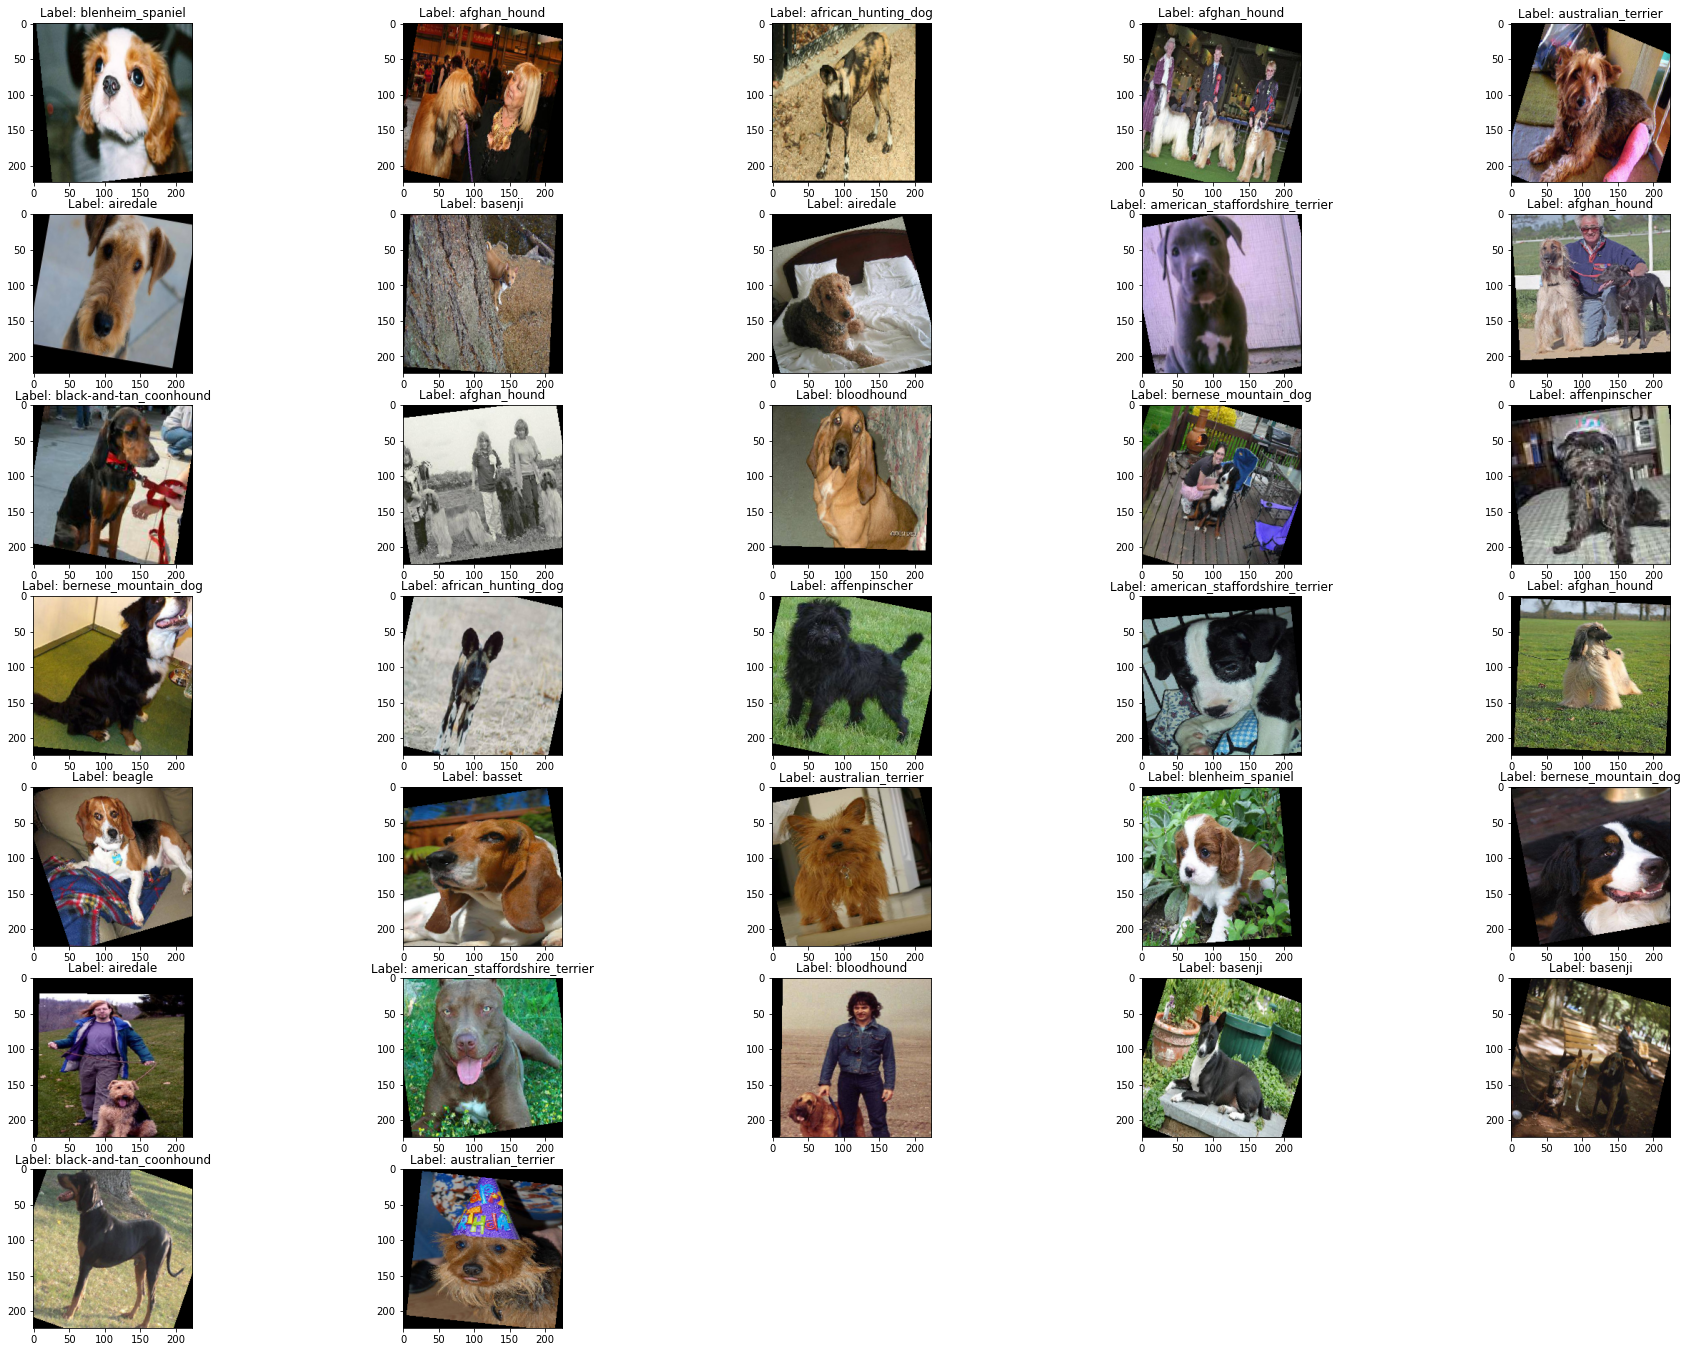

In [14]:
# Disaplying some samples from the development set
plt.figure(figsize = (32,24))
Xbatch,Ybatch = train_flow.__getitem__(0)
print(Xbatch.mean(),Xbatch.std())
print(Xbatch.min(),Xbatch.max())
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    plt.title("Label: %s" %CLASS_NAMES[int(Ybatch[ii].argmax())])
plt.show()

## TRANSFER LEARNING

In [15]:
#TRANSFER LEARNING
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False) 
base_model.trainable = False #Using it to Freeze the layers of the pre-trained model

In [16]:
#Add a top (i.e., the prediction layers)
input_image = tf.keras.Input(shape=(224, 224, 3))
x1 = base_model(input_image, training=False)
x2 = tf.keras.layers.Flatten()(x1)
out = tf.keras.layers.Dense(len(CLASS_NAMES),activation = 'softmax')(x2)
model = tf.keras.Model(inputs = input_image, outputs =out)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 15)                376335    
Total params: 15,091,023
Trainable params: 376,335
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_flow,epochs = 20, \
          verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(val_flow))

Epoch 1/20
32/32 [==============================] - 77s 2s/step - loss: 3.3664 - accuracy: 0.1413 - val_loss: 2.1060 - val_accuracy: 0.3307
Epoch 2/20
32/32 [==============================] - 81s 3s/step - loss: 1.7271 - accuracy: 0.4652 - val_loss: 1.8687 - val_accuracy: 0.4488
Epoch 3/20
32/32 [==============================] - 86s 3s/step - loss: 1.3726 - accuracy: 0.5526 - val_loss: 1.6182 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 83s 3s/step - loss: 0.8860 - accuracy: 0.7454 - val_loss: 1.5588 - val_accuracy: 0.5315
Epoch 5/20
32/32 [==============================] - 82s 3s/step - loss: 0.8288 - accuracy: 0.7590 - val_loss: 1.5394 - val_accuracy: 0.5118
Epoch 6/20
32/32 [==============================] - 82s 3s/step - loss: 0.6835 - accuracy: 0.8126 - val_loss: 1.4369 - val_accuracy: 0.5276
Epoch 7/20
32/32 [==============================] - 82s 3s/step - loss: 0.5934 - accuracy: 0.8483 - val_loss: 1.3703 - val_accuracy: 0.5512
Epoch 8/20
32/32 [==

In [21]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False) 
base_model.trainable = True # Now we are training the parameters of the pre-trained model
input_image = tf.keras.Input(shape=(224, 224, 3))
x1 = base_model(input_image, training=True)
x2 = tf.keras.layers.Flatten()(x1)
out = tf.keras.layers.Dense(len(CLASS_NAMES),activation = 'softmax')(x2)
model = tf.keras.Model(input_image, out)
print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.load_weights(model_name)
model.fit(train_flow,batch_size = 32, epochs = 5, \
          verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(val_flow))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                376335    
Total params: 15,091,023
Trainable params: 15,091,023
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
32/32 [==============================] - 318s 10s/step - loss: 0.3028 - accuracy: 0.9508 - val_loss: 1.2011 - val_accuracy: 0.6181
Epoch 2/5
32/32 [==============================] - 323s 10s/step - loss: 0.2410 - accuracy: 0.9515 

In [22]:
model.load_weights(model_name)
metrics = model.evaluate(X_test,Y_test)

5/5 [==============================] - 9s 2s/step - loss: 1.1100 - accuracy: 0.6525


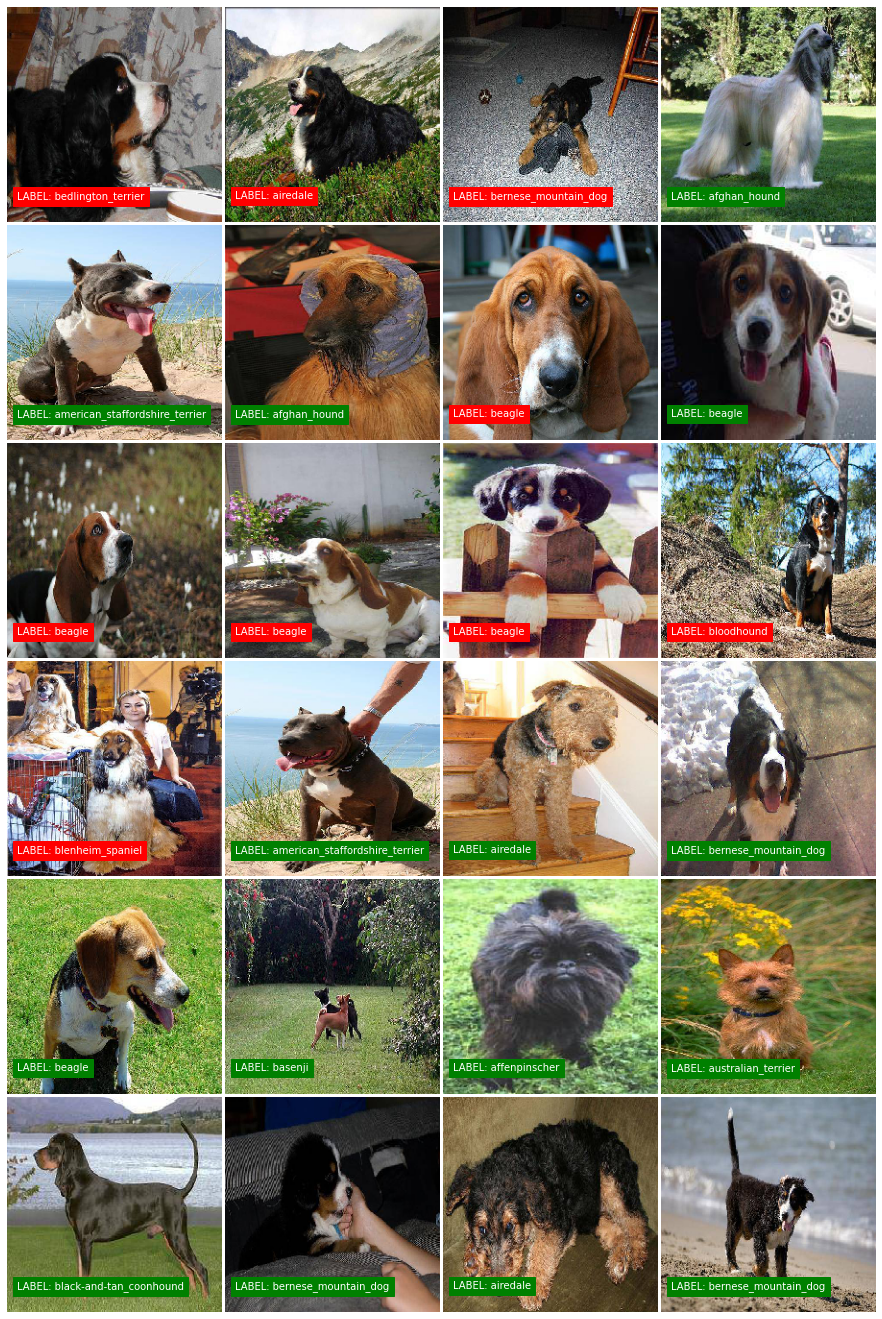

In [26]:
# Printing Wrong Predictions
Y_pred = model.predict(X_test)
wrong_indexes = np.where(Y_pred != Y_test)[0]
#print(wrong_indexes.size)

# Displaying some samples from the development set
IMG_GRID_ROWS = 6
IMG_GRID_COLUMNS = 4
num_of_images = IMG_GRID_ROWS * IMG_GRID_COLUMNS
fig = plt.figure(1, figsize=(IMG_GRID_COLUMNS * 4, IMG_GRID_ROWS * 4))
grid = ImageGrid(fig, 111, nrows_ncols=(IMG_GRID_ROWS, IMG_GRID_COLUMNS), axes_pad=0.05)

for ii in range(num_of_images):
    ax = grid[ii]
    ax.imshow(X_test[ii,:,:,:])
    
    class_index_pred = np.argmax(Y_pred[ii])
    class_index_val = np.argmax(Y_test[ii])
    
    if class_index_val == class_index_pred:
        background_color = 'g'   #Right prediction
    else:
        background_color = 'r'   #Wrong Prediction
        
    ax.text(10, 200, ('LABEL: %s' % (CLASS_NAMES[class_index_pred])),
            color = 'w',
            backgroundcolor = background_color)
    
    ax.axis('off')
plt.show()